## PCA 
[Source link](https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Load data
df = pd.read_csv('Iris.csv',index_col='Id')
df.columns = ['sepal_len','sepal_wid','petal_len','petal_wid','class']
df.dropna(how='all',inplace=True)
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# split data into X and y
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [22]:
# Explore data set
label = df['class'].unique()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f60b4d2eeb8>,
      dtype=object)

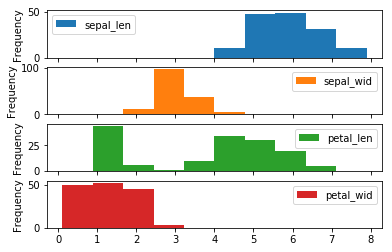

In [23]:
df.plot(kind='hist',subplots=True,stacked=True,)

In [29]:
## Preprosesing varaibles using Standard scale
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Method 1
### Eigen value decomposition
Determine covariance matrix

In [40]:
mean_vec = np.mean(X_std,axis=0)
cov_mat = (X_std - mean_vec).T.dot(X_std - mean_vec)/ (X_std.shape[0] -1)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [42]:
print('Numpy covaraince matrix/n',np.cov(X_std.T))

Numpy covaraince matrix/n [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Eigen value decomposition

In [51]:
cov_mat = np.cov(X_std.T)
eig_values, eig_vecs = np.linalg.eig(cov_mat)
print('Eigen values:\n',eig_values)
print('\nEigen Vectors:\n',eig_vecs)

Eigen values:
 [2.93035378 0.92740362 0.14834223 0.02074601]

Eigen Vectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Decompose by Correlation matrix

In [53]:
cor_mat1 = np.corrcoef(X_std.T)
eig_values, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigen values:\n',eig_values)
print('\nEigen Vectors:\n',eig_vecs)

Eigen values:
 [2.91081808 0.92122093 0.14735328 0.02060771]

Eigen Vectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Eigendecomposition of the correlation matrix.

In [54]:
cor_mat1 = np.corrcoef(X.T)
eig_values, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigen values:\n',eig_values)
print('\nEigen Vectors:\n',eig_vecs)

Eigen values:
 [2.91081808 0.92122093 0.14735328 0.02060771]

Eigen Vectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:

    Eigendecomposition of the covariance matrix after standardizing the data.
    Eigendecomposition of the correlation matrix.
    Eigendecomposition of the correlation matrix after standardizing the data.


In [56]:
## Method 2
### Single value decomposition
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])


sorting egine pairs

In [65]:
for ev in eig_vecs:
    np.testing.assert_almost_equal(1.0,np.linalg.norm(ev))
print('Everything ok')

Everything ok


In [72]:
eig_pairs = [(np.abs(eig_values[i]),eig_vecs[:,i]) for i in range(len(eig_values))]
# sort values
eig_pairs.sort(key=lambda x:x[0],reverse=True)

for i in eig_pairs:
    print(i[0])

2.9108180837520528
0.9212209307072246
0.1473532783050965
0.020607707235625047


In [76]:
tot = sum(eig_values)
var_exp = [(i/tot)*100 for i in sorted(eig_values,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

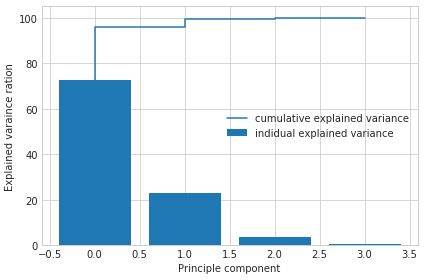

In [84]:
with plt.style.context('seaborn-whitegrid'):
    plt.bar(range(4),var_exp,label='indidual explained variance')
    plt.step(range(4),cum_var_exp,label='cumulative explained variance')
    plt.ylabel('Explained varaince ration')
    plt.xlabel('Principle component')
    plt.legend()
    plt.tight_layout()

In [92]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                     eig_pairs[1][1].reshape(4,1)))
matrix_w

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

project on to new feature space

In [96]:
Y = X_std.dot(matrix_w)

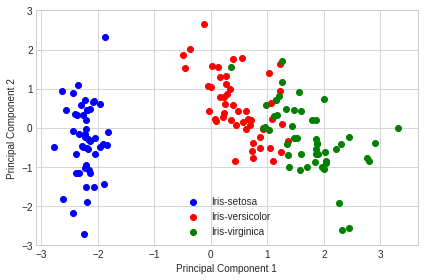

In [111]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [132]:
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [138]:
u[:2,:].T

array([[-0.52237162,  0.26335492],
       [-0.37231836, -0.92555649],
       [ 0.72101681, -0.24203288],
       [ 0.26199559, -0.12413481]])

### COVARIANCE MATRIX FROM ANDREW NG

In [5]:
A = np.array([[4 ,2, 0.6],
              [4.2, 2.1, 0.59], 
              [3.9,2,0.58],
              [4.3,2.1,.62],
              [4.1,2.2,.63]])

In [6]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
A_std = std_sc.fit_transform(A)

In [9]:
1/4*A_std.T.dot(A_std)


array([[1.25      , 0.70868339, 0.66718125],
       [0.70868339, 1.25      , 0.97265883],
       [0.66718125, 0.97265883, 1.25      ]])

In [8]:
np.cov(A_std.T)

array([[1.25      , 0.70868339, 0.66718125],
       [0.70868339, 1.25      , 0.97265883],
       [0.66718125, 0.97265883, 1.25      ]])